# Geographical services (city centre and rail stations) (R) 

## Libraries and data

In [1]:
# Import libraries
library(sf)
library(data.table)
library(ggplot2)
library(tmap)
library(tidygeocoder)
library(leaflet)
library(dplyr)
library(osmdata)
library(tmaptools)
library(tidyr)
library(readr)

Linking to GEOS 3.11.2, GDAL 3.7.0, PROJ 9.2.0; sf_use_s2() is TRUE

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Data (c) OpenStreetMap contributors, ODbL 1.0. https://www.openstreetmap.org/copyright



In [2]:
# Specify data directory
data_path = "data/geo_services/data/Brighton"

# Check what files we have
list.files(data_path)

[1] "Brighton_and_Hove_link_13082022.csv" "Brighton_pop_points_2020.gpkg"      
 [3] "Brighton-DEM.tif"                    "brightonhove_1667288932.zip"        
 [5] "brightonhove.pbf"                    "brightonhove.pbf.mapdb"             
 [7] "brightonhove.pbf.mapdb.p"            "city_centre.csv"                    
 [9] "network_settings.json"               "network.dat"                        
[11] "ONSPD_MAY_2023_UK_BN.csv"            "stations.csv"

In [3]:
# Load postcode data
postcode_dir = read_csv("data/geo_services/data/Brighton/ONSPD_MAY_2023_UK_BN.csv")
head(postcode_dir)

Rows: 35547 Columns: 53
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (42): pcd, pcd2, pcds, oscty, ced, oslaua, osward, parish, osnrth1m, osh...
dbl (10): dointr, doterm, usertype, oseast1m, osgrdind, streg, ur01ind, lat,...
lgl  (1): lep2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pcd,pcd2,pcds,dointr,doterm,oscty,ced,oslaua,osward,parish,⋯,long,lep1,lep2,pfa,imd,calncv,icb,oa21,lsoa21,msoa21
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
BN1 1AA,BN1 1AA,BN1 1AA,199002,NA,E99999999,E99999999,E06000043,E05015415,E43000034,⋯,-0.140818,E37000044,NA,E23000033,4311,E56000012,E54000064,E00085668,E01016969,E02003517
BN1 1AB,BN1 1AB,BN1 1AB,198001,NA,E99999999,E99999999,E06000043,E05015411,E43000034,⋯,-0.141790,E37000044,NA,E23000033,8856,E56000012,E54000064,E00085586,E01016952,E02003517
BN1 1AD,BN1 1AD,BN1 1AD,198307,NA,E99999999,E99999999,E06000043,E05015411,E43000034,⋯,-0.142167,E37000044,NA,E23000033,8856,E56000012,E54000064,E00184774,E01016952,E02003517
BN1 1AE,BN1 1AE,BN1 1AE,198001,NA,E99999999,E99999999,E06000043,E05015411,E43000034,⋯,-0.141753,E37000044,NA,E23000033,8856,E56000012,E54000064,E00085586,E01016952,E02003517
BN1 1AF,BN1 1AF,BN1 1AF,198001,NA,E99999999,E99999999,E06000043,E05015411,E43000034,⋯,-0.141426,E37000044,NA,E23000033,8856,E56000012,E54000064,E00085586,E01016952,E02003517
BN1 1AG,BN1 1AG,BN1 1AG,198001,NA,E99999999,E99999999,E06000043,E05015411,E43000034,⋯,-0.142871,E37000044,NA,E23000033,8856,E56000012,E54000064,E00085586,E01016952,E02003517


In [4]:
# Load postcode data
keep <- c("pcds", "lat", "long")
postcode_df = postcode_dir[keep]
head(postcode_df)

pcds,lat,long
<chr>,<dbl>,<dbl>
BN1 1AA,50.82633,-0.140818
BN1 1AB,50.82296,-0.141790
BN1 1AD,50.82169,-0.142167
BN1 1AE,50.82138,-0.141753
BN1 1AF,50.82248,-0.141426
BN1 1AG,50.82292,-0.142871


In [5]:
# df into point data
#y is lat, x is lon
postcode_points<- postcode_df%>%
  #remove NAs or 0
  filter(long != 0 )%>%
  filter(lat != 0)%>%
  st_as_sf(., coords = c("long","lat"), 
                   crs = 4326)

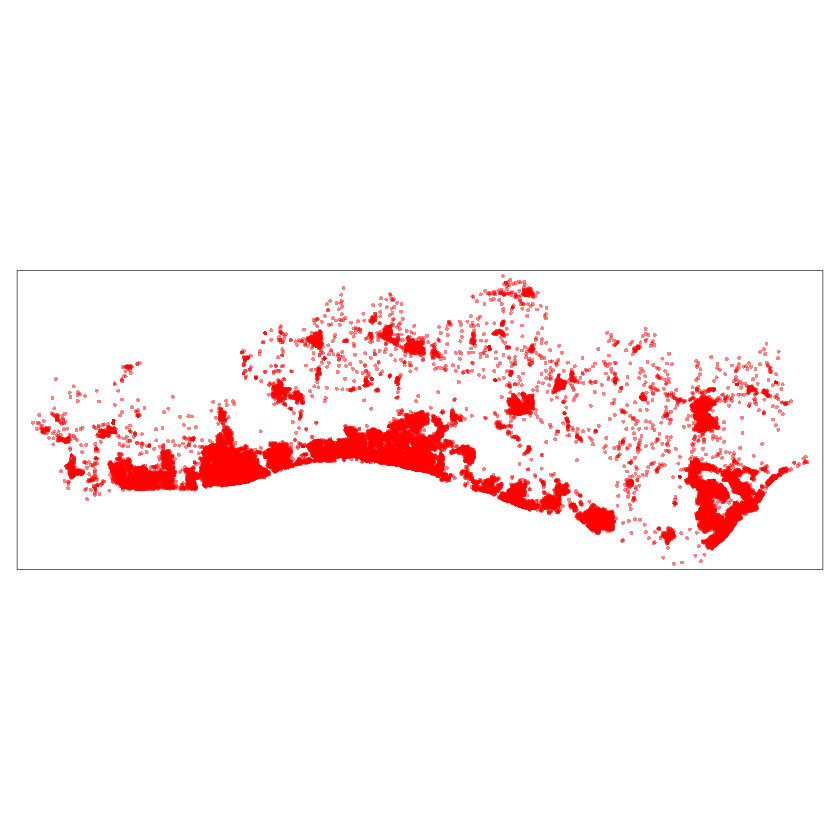

In [6]:
# Plot the points
tm_shape(postcode_points) + tm_symbols(size=0.05, col="red", border.lwd=0, alpha=0.5)

In [6]:
#rename pcds to id to fit with r5r requirements
# postcode_points %>% 
#   rename(
#     id = pcds
#     )
names(postcode_points)[names(postcode_points) == "pcds"] <- "id"

In [7]:
# Check the first 5 rows
head(postcode_points)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



id,geometry
<chr>,<POINT [°]>
BN1 1AA,POINT (-0.140818 50.82633)
BN1 1AB,POINT (-0.14179 50.82296)
BN1 1AD,POINT (-0.142167 50.82169)
BN1 1AE,POINT (-0.141753 50.82138)
BN1 1AF,POINT (-0.141426 50.82248)
BN1 1AG,POINT (-0.142871 50.82292)


In [8]:
# create a duplicate of postcode points to contain categorical variables of travel time bands
geo_time <- copy(postcode_points)

In [9]:
nrow(postcode_points)

[1] 35465

In [17]:
nrow(geo_time)

[1] 35465

# Rail Stations

In [11]:
#read in railway stations data (Brighton, Hove, Preston Park)
stations_fp = file.path(data_path, "stations.csv")
stations = read_sf(stations_fp)
head(stations)

address,id,lon,lat
<chr>,<chr>,<chr>,<chr>
Brighton railway station,0,-0.1407393,50.8288602
Preston Park railway station,1,-0.1553443,50.8460091
Hove railway station,2,-0.17018,50.8352056


In [12]:
stations$lon = as.numeric(as.character(stations$lon))
stations$lat = as.numeric(as.character(stations$lat))
stations$id = as.double(as.character(stations$id))
stations = stations %>% st_drop_geometry()
class(stations)

[1] "tbl_df"     "tbl"        "data.frame"

## Prepare routable network with r5r

In [18]:
# Allow 6 GiB of memory
options(java.parameters = "-Xmx6G")

In [19]:
# After allocating the memory import the r5r
library(r5r)

In [20]:
# Create the routable network by indicating the path where OSM, GTFS and possible DEM data are stored
r5r_core = setup_r5(data_path = data_path)

Using cached R5 version from /home/jtej22/miniconda3/envs/r5/lib/R/library/r5r/jar/r5-v6.9-all.jar


Using cached network.dat from data/Brighton/network.dat



In [21]:
# Our population points already has the `x` and `y` columns, check id 
head(geo_time)

id,geometry
<chr>,<POINT [°]>
BN1 1AA,POINT (-0.140818 50.82633)
BN1 1AB,POINT (-0.14179 50.82296)
BN1 1AD,POINT (-0.142167 50.82169)
BN1 1AE,POINT (-0.141753 50.82138)
BN1 1AF,POINT (-0.141426 50.82248)
BN1 1AG,POINT (-0.142871 50.82292)


## Walk time to nearest rail station for all postcodes

In [ ]:
# Set parameters
mode = c("WALK")
max_walk_time = 200 # minutes
max_trip_duration = 200 # minutes
departure_datetime = as.POSIXct("01-12-2022 8:30:00",
                                 format = "%d-%m-%Y %H:%M:%S")

# Calculate the travel time matrix by Transit
ttm_rail_walk_all = travel_time_matrix(r5r_core = r5r_core,
                          origins = stations,
                          destinations = geo_time,
                          mode = mode,
                          departure_datetime = departure_datetime,
                          max_walk_time = max_walk_time,
                          max_trip_duration = max_trip_duration)

head(ttm_rail_walk_all)

In [ ]:
nrow(ttm_rail_walk)

In [ ]:
# Handle duplicates for walk travel time to rail stations
ttm_rail_walk_all <- ttm_rail_walk_all %>%
  group_by(to_id) %>% 
  arrange(travel_time_p50) %>%
  slice_head(n = 1) %>% 
  ungroup()

In [ ]:
# Check for duplicates in 'id' column of df1
duplicates_ttm_rail_walk_all <- duplicated(ttm_rail_walk_all$to_id)
# Check for duplicates in 'id' column of df2
duplicates_geo_time <- duplicated(geo_time$id)

# Check if there are duplicates in df1 or df2
if (any(duplicates_ttm_rail_walk_all) || any(duplicates_geo_time)) {
  print("Duplicates found! Please handle duplicates before performing left join.")
} else {
  # Perform the left join, walk time bands from rail station to postcodes
  geo_time <- left_join(geo_time, ttm_rail_walk_all, by=c(id = "to_id"))
  # Print the resulting merged data frame
  print(geo_time)
}

In [ ]:
geo_time$walk_nearest_rail <- geo_time$travel_time_p50
geo_time$travel_time_p50 <- NULL

In [ ]:
# Plot the travel times
tm_shape(geo_time) + tm_symbols(col="walk_nearest_rail", size=0.2, border.lwd=0)

## Walking bands (5, 10, 15, 20, 25, 30)

In [22]:
# Set parameters
mode = c("WALK")
max_walk_time = 30 # minutes
max_trip_duration = 30 # minutes
departure_datetime = as.POSIXct("01-12-2022 8:30:00",
                                 format = "%d-%m-%Y %H:%M:%S")

# Calculate the travel time matrix by Transit
ttm_rail_walk = travel_time_matrix(r5r_core = r5r_core,
                          origins = stations,
                          destinations = geo_time,
                          mode = mode,
                          departure_datetime = departure_datetime,
                          max_walk_time = max_walk_time,
                          max_trip_duration = max_trip_duration)

head(ttm_rail_walk)

Warning message in assign_points_input(origins, "origins"):
“'origins$id' forcefully cast to character.”


from_id,to_id,travel_time_p50
<chr>,<chr>,<int>
0,BN1 1AA,7
0,BN1 1AB,15
0,BN1 1AD,18
0,BN1 1AE,18
0,BN1 1AF,16
0,BN1 1AG,14


In [25]:
nrow(ttm_rail_walk)

[1] 13218

In [24]:
# Handle duplicates for walk travel time to rail stations
ttm_rail_walk <- ttm_rail_walk %>%
  group_by(to_id) %>% 
  arrange(travel_time_p50) %>%
  slice_head(n = 1) %>% 
  ungroup()

In [21]:
# Check for duplicates in 'id' column of df1
duplicates_ttm_rail_walk <- duplicated(ttm_rail_walk$to_id)
# Check for duplicates in 'id' column of df2
duplicates_geo_time <- duplicated(geo_time$id)

# Check if there are duplicates in df1 or df2
if (any(duplicates_ttm_rail_walk) || any(duplicates_geo_time)) {
  print("Duplicates found! Please handle duplicates before performing left join.")
} else {
  # Perform the left join, walk time bands from rail station to postcodes
  geo_time <- left_join(geo_time, ttm_rail_walk, by=c(id = "to_id"))
  # Print the resulting merged data frame
  print(geo_time)
}

Simple feature collection with 35465 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 4
   id                  geometry from_id travel_time_p50
   <chr>            <POINT [°]> <chr>             <int>
 1 BN1 1AA (-0.140818 50.82633) 0                     7
 2 BN1 1AB  (-0.14179 50.82296) 0                    15
 3 BN1 1AD (-0.142167 50.82169) 0                    18
 4 BN1 1AE (-0.141753 50.82138) 0                    18
 5 BN1 1AF (-0.141426 50.82248) 0                    16
 6 BN1 1AG (-0.142871 50.82292) 0                    14
 7 BN1 1AH (-0.142864 50.82274) 0                    14
 8 BN1 1AJ  (-0.14256 50.82145) 0                    18
 9 BN1 1AL (-0.142961 50.82136) 0                    17
10 BN1 1AN   (-0.1435 50.82209) 0                    15
# ℹ 35,455 more rows


In [24]:
# Create a new categorical column based on travel time
# Define the breaks for the bands (including endpoints)
breaks <- c(0, 5, 10, 15, 20, 25, 30)
#, 25, 30)

# Define the labels for each band
labels <- c("0-5_mins", "5-10_mins", "10-15_mins", "15-20_mins", "20-25_mins", "25-30_mins")

# Create the categorical column based on travel time bands
geo_time$rail_walk_time <- cut(geo_time$travel_time_p50, breaks = breaks, labels = labels, include.lowest = TRUE, right = FALSE)

# Print the updated data frame
head(geo_time)


id,geometry,from_id,travel_time_p50,rail_walk_time
<chr>,<POINT [°]>,<chr>,<int>,<fct>
BN1 1AA,POINT (-0.140818 50.82633),0,7,5-10_mins
BN1 1AB,POINT (-0.14179 50.82296),0,15,15-20_mins
BN1 1AD,POINT (-0.142167 50.82169),0,18,15-20_mins
BN1 1AE,POINT (-0.141753 50.82138),0,18,15-20_mins
BN1 1AF,POINT (-0.141426 50.82248),0,16,15-20_mins
BN1 1AG,POINT (-0.142871 50.82292),0,14,10-15_mins


In [22]:
#use from_id to generate rail name
#from postcode to rail name
postcode_rail_dict <- setNames(stations$address, stations$id)
# Use match() and the dictionary to replace postcodes with school names
geo_time$nearest_rail_name <- postcode_rail_dict[match(geo_time$from_id, names(postcode_rail_dict))]
## nearest rail name is limited to 30 mins proximity

In [30]:
head(geo_time)

walk_nearest_rail,geometry,joincode
<int>,<POINT [°]>,<chr>
7,POINT (-0.140818 50.82633),BN1 1AA
15,POINT (-0.14179 50.82296),BN1 1AB
18,POINT (-0.142167 50.82169),BN1 1AD
18,POINT (-0.141753 50.82138),BN1 1AE
16,POINT (-0.141426 50.82248),BN1 1AF
14,POINT (-0.142871 50.82292),BN1 1AG


In [24]:
geo_time$walk_nearest_rail <- geo_time$travel_time_p50

In [26]:
geo_time$travel_time_p50 <- NULL

In [28]:
geo_time <- subset(geo_time, select = -c(geometry, from_id, nearest_rail_name))

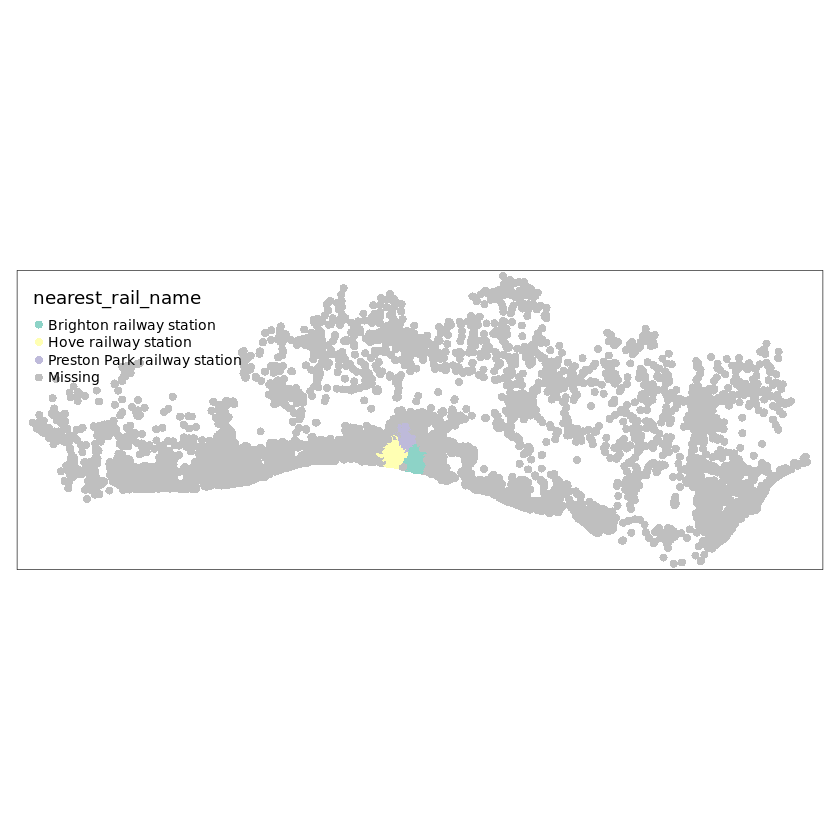

In [27]:
# Plot the travel times
tm_shape(geo_time) + tm_symbols(col="nearest_rail_name", size=0.2, border.lwd=0)

In [28]:
## Drop the columns from_id and travel_time_p50
geo_time <- geo_time[, !(names(geo_time) %in% c('from_id', 'travel_time_p50'))]

# Print the updated data frame
print(geo_time)

Simple feature collection with 35465 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 4
   id                  geometry rail_walk_time nearest_rail_name       
   <chr>            <POINT [°]> <fct>          <chr>                   
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway station
 9 BN1 1AL (-0.142961 50.82136) 15-20_mins     Brighton railway

In [29]:
print(sum(is.na(geo_time$rail_walk_time)))

[1] 29286


In [30]:
nrow(geo_time)

[1] 35465

## Rail Bus time bands (5, 10, 15, 20, 25, 30)

In [39]:
# Set parameters
mode = c("WALK","BUS")
max_walk_time = 10 # minutes
max_trip_duration = 30 # minutes
departure_datetime = as.POSIXct("01-12-2022 8:30:00",
                                 format = "%d-%m-%Y %H:%M:%S")

# Calculate the travel time matrix by Transit
ttm_rail_bus = travel_time_matrix(r5r_core = r5r_core,
                          origins = stations,
                          destinations = geo_time,
                          mode = mode,
                          departure_datetime = departure_datetime,
                          max_walk_time = max_walk_time,
                          max_trip_duration = max_trip_duration)

head(ttm_rail_bus)


Warning message in assign_points_input(origins, "origins"):
“'origins$id' forcefully cast to character.”


from_id,to_id,travel_time_p50
<chr>,<chr>,<int>
0,BN1 1AA,7
0,BN1 1AB,13
0,BN1 1AD,15
0,BN1 1AE,15
0,BN1 1AF,13
0,BN1 1AG,12


In [40]:
nrow(ttm_rail_bus)

[1] 12719

In [43]:
# Handle duplicates for bus travel time to rail stations
ttm_rail_bus <- ttm_rail_bus %>% 
    group_by(to_id) %>%
    arrange(travel_time_p50) %>%
    slice_head(n=1) %>%
    ungroup()

In [44]:
nrow(ttm_rail_bus)

[1] 7258

In [45]:
# Check for duplicates in 'id' column of df1
duplicates_ttm_rail_bus <- duplicated(ttm_rail_bus$to_id)
# Check for duplicates in 'id' column of df2
duplicates_geo_time <- duplicated(geo_time$id)

# Check if there are duplicates in df1 or df2
if (any(duplicates_ttm_rail_bus) || any(duplicates_geo_time)) {
  print("Duplicates found! Please handle duplicates before performing left join.")
} else {
  # Perform the left join, walk time bands from rail station to postcodes
  geo_time <- left_join(geo_time, ttm_rail_bus, by=c(id = "to_id"))
  # Print the resulting merged data frame
  print(geo_time)
}

Simple feature collection with 35465 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 6
   id                  geometry rail_walk_time nearest_rail_name        from_id
   <chr>            <POINT [°]> <fct>          <chr>                    <chr>  
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station 0      
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station 0      
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station 0      
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station 0      
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station 0      
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station 0      
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station 0      
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway

In [46]:
nrow(geo_time)

[1] 35465

In [47]:
# Create a new categorical column based on travel time
# Define the breaks for the bands (including endpoints)
breaks <- c(0, 5, 10, 15, 20, 25, 30)


# Define the labels for each band
labels <- c("0-5_mins", "5-10_mins", "10-15_mins", "15-20_mins", "20-25_mins", "25-30_mins")
#"30-35_mins", "35-40_mins")


# Create the categorical column based on travel time bands
geo_time$rail_bus_time <- cut(geo_time$travel_time_p50, breaks = breaks, labels = labels, include.lowest = TRUE, right = FALSE)

# Print the updated data frame
print(geo_time)

Simple feature collection with 35465 features and 6 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 7
   id                  geometry rail_walk_time nearest_rail_name        from_id
 * <chr>            <POINT [°]> <fct>          <chr>                    <chr>  
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station 0      
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station 0      
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station 0      
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station 0      
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station 0      
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station 0      
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station 0      
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway

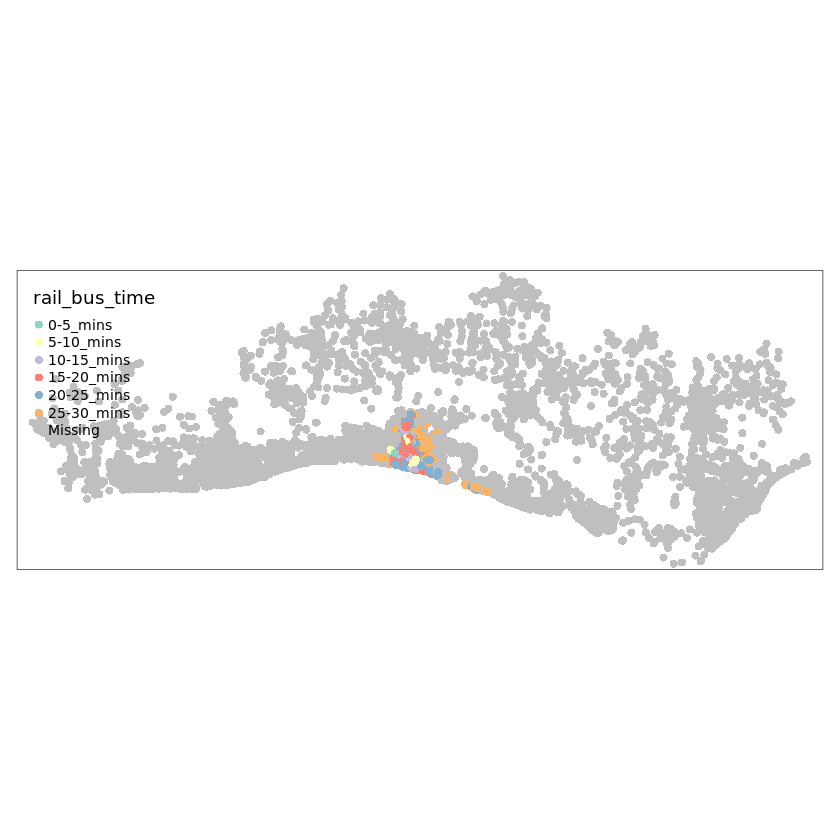

In [34]:
# Plot the travel times
tm_shape(geo_time) + tm_symbols(col="rail_bus_time", size=0.2, border.lwd=0)

In [53]:
## Drop the columns from_id and travel_time_p50
geo_time <- geo_time[, !(names(geo_time) %in% c('from_id', 'travel_time_p50'))]

# Print the updated data frame
print(geo_time)

Simple feature collection with 35465 features and 4 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 5
   id                  geometry rail_walk_time nearest_rail_name       
   <chr>            <POINT [°]> <fct>          <chr>                   
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway station
 9 BN1 1AL (-0.142961 50.82136) 15-20_mins     Brighton railway

In [56]:
print(sum(is.na(geo_time$rail_bus_time)))

[1] 28207


In [55]:
nrow(geo_time)

[1] 35465

In [57]:
comparison_table <- table(geo_time$rail_walk_time, geo_time$rail_bus_time, useNA = "always")

# Print the comparison table
print(comparison_table)

            
             0-5_mins 5-10_mins 10-15_mins 15-20_mins 20-25_mins 25-30_mins
  0-5_mins        952         0          0          0          0          0
  5-10_mins         0      2071          0          0          0          0
  10-15_mins        0        85        221        191         20         13
  15-20_mins        0         0        236        398         98         46
  20-25_mins        0         0        116        373        214         87
  25-30_mins        0         0         16        232        459        133
  <NA>              0         0          1        206        379        711
            
              <NA>
  0-5_mins       0
  5-10_mins      0
  10-15_mins    11
  15-20_mins    33
  20-25_mins    94
  25-30_mins    80
  <NA>       27989


# City Centre 

In [58]:
#read in city centre coords
city_centre_fp = file.path(data_path, "city_centre.csv")
citycen = read_sf(city_centre_fp)
head(citycen)

address,id,lon,lat
<chr>,<chr>,<chr>,<chr>
Brighton City Centre,0,-0.140272,50.822566


In [59]:
citycen$lon = as.numeric(as.character(citycen$lon))
citycen$lat = as.numeric(as.character(citycen$lat))
citycen$id = as.double(as.character(citycen$id))
citycen = citycen %>% st_drop_geometry()
class(citycen)

[1] "tbl_df"     "tbl"        "data.frame"

## Walking time bands (5,10,15,20,25,30)

In [60]:
# Set parameters
mode = c("WALK")
max_walk_time = 30 # minutes
max_trip_duration = 30 # minutes
departure_datetime = as.POSIXct("01-12-2022 8:30:00",
                                 format = "%d-%m-%Y %H:%M:%S")

# Calculate the travel time matrix by Transit
ttm_cc_walk = travel_time_matrix(r5r_core = r5r_core,
                          origins = citycen,
                          destinations = geo_time,
                          mode = mode,
                          departure_datetime = departure_datetime,
                          max_walk_time = max_walk_time,
                          max_trip_duration = max_trip_duration)

head(ttm_cc_walk)

Warning message in assign_points_input(origins, "origins"):
“'origins$id' forcefully cast to character.”


from_id,to_id,travel_time_p50
<chr>,<chr>,<int>
0,BN1 1AA,10
0,BN1 1AB,3
0,BN1 1AD,3
0,BN1 1AE,4
0,BN1 1AF,2
0,BN1 1AG,4


In [61]:
# Handle duplicates for bus travel time to city centre (tho unlikely)
ttm_cc_walk <- subset(ttm_cc_walk, select = -c(from_id))

ttm_cc_walk <- ttm_cc_walk %>% 
group_by(to_id) %>%
slice_min(travel_time_p50) %>%
distinct()

In [62]:
# Check for duplicates in 'id' column of df1
duplicates_ttm_cc_walk <- duplicated(ttm_cc_walk$to_id)
# Check for duplicates in 'id' column of df2
duplicates_geo_time <- duplicated(geo_time$id)

# Check if there are duplicates in df1 or df2
if (any(duplicates_ttm_cc_walk) || any(duplicates_geo_time)) {
  print("Duplicates found! Please handle duplicates before performing left join.")
} else {
  # Perform the left join, walk time bands from rail station to postcodes
  geo_time <- left_join(geo_time, ttm_cc_walk, by=c(id = "to_id"))
  # Print the resulting merged data frame
  print(geo_time)
}

Simple feature collection with 35465 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 6
   id                  geometry rail_walk_time nearest_rail_name       
   <chr>            <POINT [°]> <fct>          <chr>                   
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway station
 9 BN1 1AL (-0.142961 50.82136) 15-20_mins     Brighton railway

In [63]:
# Create a new categorical column based on travel time
# Define the breaks for the bands (including endpoints)
breaks <- c(0, 5, 10, 15, 20, 25, 30)


# Define the labels for each band
labels <- c("0-5_mins", "5-10_mins", "10-15_mins", "15-20_mins", "20-25_mins", "25-30_mins")

# Create the categorical column based on travel time bands
geo_time$cc_walk_time <- cut(geo_time$travel_time_p50, breaks = breaks, labels = labels, include.lowest = TRUE, right = FALSE)

# Print the updated data frame
print(geo_time)


Simple feature collection with 35465 features and 6 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 7
   id                  geometry rail_walk_time nearest_rail_name       
 * <chr>            <POINT [°]> <fct>          <chr>                   
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway station
 9 BN1 1AL (-0.142961 50.82136) 15-20_mins     Brighton railway

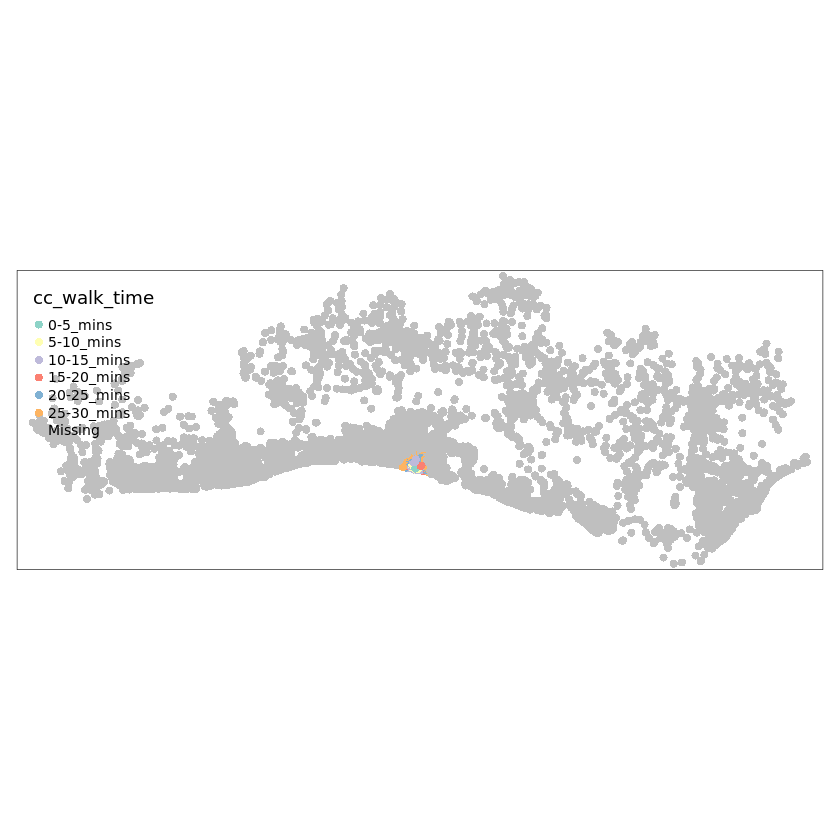

In [45]:
# Plot the travel times
tm_shape(geo_time) + tm_symbols(col="cc_walk_time", size=0.2, border.lwd=0)

In [64]:
## Drop the columns from_id and travel_time_p50
geo_time <- geo_time[, !(names(geo_time) %in% c('from_id', 'travel_time_p50'))]

# Print the updated data frame
print(geo_time)

Simple feature collection with 35465 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 6
   id                  geometry rail_walk_time nearest_rail_name       
   <chr>            <POINT [°]> <fct>          <chr>                   
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway station
 9 BN1 1AL (-0.142961 50.82136) 15-20_mins     Brighton railway

## Bus time bands to city centre

In [65]:
# Set parameters
mode = c("WALK","BUS")
max_walk_time = 20 # minutes
max_trip_duration = 45 # minutes
departure_datetime = as.POSIXct("01-12-2022 8:30:00",
                                 format = "%d-%m-%Y %H:%M:%S")

# Calculate the travel time matrix by Transit
ttm_cc_bus = travel_time_matrix(r5r_core = r5r_core,
                          origins = citycen,
                          destinations = geo_time,
                          mode = mode,
                          departure_datetime = departure_datetime,
                          max_walk_time = max_walk_time,
                          max_trip_duration = max_trip_duration)

head(ttm_cc_bus)

Warning message in assign_points_input(origins, "origins"):
“'origins$id' forcefully cast to character.”


from_id,to_id,travel_time_p50
<chr>,<chr>,<int>
0,BN1 1AA,10
0,BN1 1AB,3
0,BN1 1AD,3
0,BN1 1AE,4
0,BN1 1AF,2
0,BN1 1AG,4


In [66]:
# Handle duplicates for bus travel time to city centre (tho unlikely)
ttm_cc_bus <- subset(ttm_cc_bus, select = -c(from_id))

ttm_cc_bus <- ttm_cc_bus %>% 
group_by(to_id) %>%
slice_min(travel_time_p50) %>%
distinct()

In [67]:
# Check for duplicates in 'id' column of df1
duplicates_ttm_cc_bus <- duplicated(ttm_cc_bus$to_id)
# Check for duplicates in 'id' column of df2
duplicates_geo_time <- duplicated(geo_time$id)

# Check if there are duplicates in df1 or df2
if (any(duplicates_ttm_cc_bus) || any(duplicates_geo_time)) {
  print("Duplicates found! Please handle duplicates before performing left join.")
} else {
  # Perform the left join, walk time bands from rail station to postcodes
  geo_time <- left_join(geo_time, ttm_cc_bus, by=c(id = "to_id"))
  # Print the resulting merged data frame
  print(geo_time)
}

Simple feature collection with 35465 features and 6 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 7
   id                  geometry rail_walk_time nearest_rail_name       
   <chr>            <POINT [°]> <fct>          <chr>                   
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway station
 9 BN1 1AL (-0.142961 50.82136) 15-20_mins     Brighton railway

In [68]:
# Create a new categorical column based on travel time
# Define the breaks for the bands (including endpoints)
breaks <- c(0, 5, 10, 15, 20, 25, 30, 35, 40, 45)


# Define the labels for each band
labels <- c("0-5_mins", "5-10_mins", "10-15_mins", "15-20_mins", "20-25_mins", "25-30_mins", "30-35_mins", "35-40_mins",
           "40-45_mins")

# Create the categorical column based on travel time bands
geo_time$cc_bus_time <- cut(geo_time$travel_time_p50, breaks = breaks, labels = labels, include.lowest = TRUE, right = FALSE)

# Print the updated data frame
print(geo_time)


Simple feature collection with 35465 features and 7 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 8
   id                  geometry rail_walk_time nearest_rail_name       
 * <chr>            <POINT [°]> <fct>          <chr>                   
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway station
 9 BN1 1AL (-0.142961 50.82136) 15-20_mins     Brighton railway

In [69]:
# Plot the travel times
m <- tm_shape(geo_time) + tm_symbols(col="cc_bus_time", size=0.2, border.lwd=0)
tmap_save(m, "cc_bus_time.png")

Map saved to /mnt/c/Users/josia/Documents/code/CASA/diss/3A. data/geo_services/cc_bus_time.png

Resolution: 3444.507 by 1280.299 pixels

Size: 11.48169 by 4.267664 inches (300 dpi)



In [70]:
## Drop the columns from_id and travel_time_p50
geo_time <- geo_time[, !(names(geo_time) %in% c('from_id', 'travel_time_p50'))]

# Print the updated data frame
print(geo_time)

Simple feature collection with 35465 features and 6 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -0.664785 ymin: 50.73827 xmax: 0.3975 ymax: 50.98748
Geodetic CRS:  WGS 84
# A tibble: 35,465 × 7
   id                  geometry rail_walk_time nearest_rail_name       
   <chr>            <POINT [°]> <fct>          <chr>                   
 1 BN1 1AA (-0.140818 50.82633) 5-10_mins      Brighton railway station
 2 BN1 1AB  (-0.14179 50.82296) 15-20_mins     Brighton railway station
 3 BN1 1AD (-0.142167 50.82169) 15-20_mins     Brighton railway station
 4 BN1 1AE (-0.141753 50.82138) 15-20_mins     Brighton railway station
 5 BN1 1AF (-0.141426 50.82248) 15-20_mins     Brighton railway station
 6 BN1 1AG (-0.142871 50.82292) 10-15_mins     Brighton railway station
 7 BN1 1AH (-0.142864 50.82274) 10-15_mins     Brighton railway station
 8 BN1 1AJ  (-0.14256 50.82145) 15-20_mins     Brighton railway station
 9 BN1 1AL (-0.142961 50.82136) 15-20_mins     Brighton railway

In [71]:
comparison_table2 <- table(geo_time$cc_walk_time, geo_time$cc_bus_time, useNA = "always")

# Print the comparison table
print(comparison_table2)

            
             0-5_mins 5-10_mins 10-15_mins 15-20_mins 20-25_mins 25-30_mins
  0-5_mins        177         0          0          0          0          0
  5-10_mins         0       221          0          0          0          0
  10-15_mins        0        80       1885          0          0          0
  15-20_mins        0        17        288        126          0          0
  20-25_mins        0         1        181        198         68          0
  25-30_mins        0         0        118        146        241         12
  <NA>              0         0         52        571       1687       1192
            
             30-35_mins 35-40_mins 40-45_mins  <NA>
  0-5_mins            0          0          0     0
  5-10_mins           0          0          0     0
  10-15_mins          0          0          0     0
  15-20_mins          0          0          0     0
  20-25_mins          0          0          0     0
  25-30_mins          0          0          0     0
  

In [72]:
### Save 
# Extract the latitude and longitude coordinates
coordinates <- st_coordinates(geo_time)

# Combine the coordinates with the other columns of the object
df <- cbind.data.frame(geo_time[, -2], coordinates)

# Rename the coordinate columns
colnames(df)[5:6] <- c("longitude", "latitude")

# Save the resulting data frame to a CSV file
write.csv(df, file = "geotimes.csv", row.names = FALSE)

In [56]:
st_write(geo_time, 'dataset/postcode_data.shp')

Warning message in abbreviate_shapefile_names(obj):
“Field names abbreviated for ESRI Shapefile driver”


Writing layer `postcode_data' to data source 
  `dataset/postcode_data.shp' using driver `ESRI Shapefile'
Writing 35465 features with 5 fields and geometry type Point.


In [73]:
geo_time_df <- subset(geo_time, select = -c(geometry))

In [58]:
nrow(geo_time)

[1] 35465

In [59]:
nrow(geo_time_df)

[1] 35465

# Joining all travel times to priceper dataset


In [60]:
#priceper = read_csv("data/Brighton/Brighton_and_Hove_link_13082022.csv")

Rows: 114152 Columns: 16
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): propertytype, duration, postcode, lad21cd, transactionid, CONSTRUC...
dbl  (9): priceper, year, price, id, tfarea, numberrooms, classt, CURRENT_EN...
date (1): dateoftransfer

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [62]:
#priceper_time <- left_join(priceper, geo_time_df, by=c("postcode" = "id"))
#head(priceper_time)

priceper,year,dateoftransfer,propertytype,duration,price,postcode,lad21cd,transactionid,id,⋯,numberrooms,classt,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,CONSTRUCTION_AGE_BAND,rail_walk_time,rail_bus_time,cc_walk_time,cc_bus_time,geometry
<dbl>,<dbl>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<POINT [°]>
4244.731,2015,2015-11-13,F,L,290000,BN1 1AD,E06000043,{288DCE29-0585-E510-E050-A8C06205480E},3268426,⋯,3,11,69,76,England and Wales: before 1900,15-20_mins,15-20_mins,0-5_mins,0-5_mins,POINT (-0.142167 50.82169)
2927.400,2003,2003-02-21,F,L,200000,BN1 1AD,E06000043,{8F424A5C-E6DD-492F-8827-7AF9523BB665},3268426,⋯,3,11,69,76,England and Wales: before 1900,15-20_mins,15-20_mins,0-5_mins,0-5_mins,POINT (-0.142167 50.82169)
3496.503,2013,2013-12-04,F,L,500000,BN1 1AD,E06000043,{AECCFEF8-D159-4688-B479-62C68F590D73},3279748,⋯,4,11,67,78,England and Wales: 1930-1949,15-20_mins,15-20_mins,0-5_mins,0-5_mins,POINT (-0.142167 50.82169)
3220.141,2006,2006-11-02,F,L,220000,BN1 1AD,E06000043,{4863D52D-C206-4176-9706-A19CDFA1678E},3268426,⋯,3,11,69,76,England and Wales: before 1900,15-20_mins,15-20_mins,0-5_mins,0-5_mins,POINT (-0.142167 50.82169)
1816.084,2004,2004-08-26,F,L,259700,BN1 1AD,E06000043,{DEC7C004-0B15-42DA-8620-A4D8B25855E5},3279748,⋯,4,11,67,78,England and Wales: 1930-1949,15-20_mins,15-20_mins,0-5_mins,0-5_mins,POINT (-0.142167 50.82169)
3146.853,2017,2017-03-31,F,L,450000,BN1 1AD,E06000043,{4E95D757-551D-EDA1-E050-A8C0630539E2},3328370,⋯,5,11,58,81,England and Wales: before 1900,15-20_mins,15-20_mins,0-5_mins,0-5_mins,POINT (-0.142167 50.82169)


In [64]:
#nrow(priceper_time)

[1] 114152

In [65]:
#nrow(priceper)

[1] 114152

In [66]:
# priceper_time <- priceper_time[, !(names(priceper_time) %in% c('geometry'))]
# nrow(priceper_time)
# save with write.csv(priceper_time, file = "priceper_railcc.csv", row.names = FALSE)


[1] 114152